# Interpolation

In this exercise we will look at one dimensional interpolation as a way to approximate new data points from a discrete set of known data.

## Warm up: Linear interpolation

The first method we will implement is linear interpolation. This is one of the simplest ways to interpolate between points that can give good results.

Let's assume as an example that we have a set of temperature measurements done different times. If we want to approximate the temperature between two of the measured times, one way to do that would be to draw a straight line between the two known measurements, we can think of these as coordinate pairs $(x_1,y_1)$ and $(x_2,y_2)$, and use that as an approximation.

## a)

Implement the following pseudocode in the function definition below:

slope = (y_end - y_start) / (x_end - x_start)

interpolate = y_start + (interpolation_point - x_start) * slope

Remember that in Python, the first element in a list of n elements has index 0 and the last element has index n-1. E.g. if we make a list of 3 elements and we want to print the first element, we would write

```
list_of_stuff = [1,2,3]
print(list_of_stuff[0])
1
>>>
```

The code below should print 18.4 when it interpolates correctly.


In [22]:


x_data = [0.0,2.0]
y_data = [22.3,14.5]
point = 1.0

def linear_interpolation(x,y,point):
    """This function should take two lists containing two numbers each, corresponding to two points,
    and a number as an input. It should return the linear interpolation at the point between the two points"""
    ##Write your code here
    
    return interpolated_y_value


inter_val = linear_interpolation(x_data,y_data, point)
print(inter_val)


18.4


Next, we want to expand the functionality of the code above. If we have very large datasets and/or we want to interpolate many points it can be tedious and time consuming to manually go through the list and finding the indeces of the points. It would be nice if we could give larger datasets together with a point as inputs, and make the function figure out where it should interpolate.

One thing we can do to achieve this is run through our list of "x-values" and check if the point we have given lies between the current value in the list, and the next one.

For example, let's take a list that is similar to the one we used above and imagine that it is a set of times. We now want to find out what points we want to use if we are to interpolate at the time 2.5. In pseudocode we want to do something like this:

```
list_of_stuff = [1,2,3,4]
point = 2.5

for i in range(length of list_of_stuff):
    if point > list_of_stuff[i] and point < list_of_stuff[i+1]:
        use the index i to interpolate
        break
```

In this small example we can go through what is going to happen step by step. The loop will start out with i = 0, so the list element with index i = 0 becomes 1, the element with index i + 1 = 1 becomes 2. First it checks if 2.5 larger than 1, then it checks if 2 is less than 2.5 and executes the code in the if-statement only if both of those are true. Clearly, 2 is larger than 2.5, so it does not execute. 

On the next loop, i increments to 1 and the list element with index i = 1 is now 2, and the element with index i + 1 = 2 is 3. It will first check if 2.5 is larger than 2, then it checks if 2.5 is less than 3. As both of these are correct, the code in the if-statement will execute and the loop will end because of the break statement.

We would also need to store the value of the index i in a variable if we want to use this later in the code.

The pseudocode above will not give us the required index if we give a point that is outside of the range of our dataset (we can't give a time that is earlier than the earliest time we have data for, or later than the latest time), it will also fail if we try to interpolate at a point where we have a measurement (for instance at the point 1 or 3). You can try to solve these issues with simple checks in your code.

## b)

Implement the pseudocode above in your code from a), remember to store the index you find in a variable for use in the interpolation. 

When you run the block below it should print 7.857, and blue cross (the interpolated point) should lie on a straight line between the two adjacent red dots in the plot.

7.857


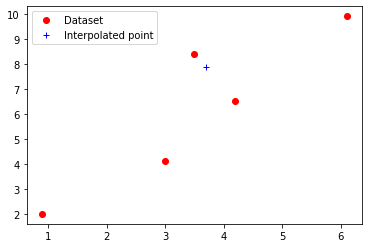

In [25]:
import matplotlib.pyplot as plt

dataset_x = [0.9,3.0,3.5,4.2,6.1]
dataset_y = [2.0,4.1,8.4,6.5,9.9]
point = 3.7

def automatic_interpolation(x,y,point):
    """This function should take in two lists of corresponding data and 
    a point to interpolate"""
    ## Write your code here

    ### Creates lists with only the points we want to interpolate between for use in the function from a) 
    x_data = [x[index], x[index+1]]
    y_data = [y[index], y[index+1]]
    
    inter_value = linear_interpolation(x_data,y_data,point)
    return inter_value


inter_val = automatic_interpolation(dataset_x,dataset_y, point)
print(round(inter_val,3))

plt.plot(dataset_x, dataset_y,"ro", label = "Dataset")
plt.plot(point,inter_val,"b+", label = "Interpolated point")
plt.legend()


## Quadratic and cubic interpolation

### Quadratic interpolation

Linear interpolation is simple and quick, but it is not always a good fit for the data we are looking at, it is often more realistic that the measurements would change smoothly rather than the sudden change we assume in linear interpolation.

A quadratic function or a cubic function can give us just that.

If we want to find for instance a quadratic function that fits our points, we can start by assuming that we can fit a function on the form 

$$g(x) = k_0 + k_1 x + k_2 x^2$$

(where $k_0,k_1, k_2$ are constants) to our data.

This has 3 unknowns, so if we insert 3 points from our dataset and demand that the function should pass through the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, $(x_2, f(x_2))$, we should be able to solve for the constants.

The above form of the function $f(x)$ is not the most practical for interpolation, if we instead write our quadratic function on the form

$$f(x) = c_0 + c_1 (x-x_0) + c_2 (x-x_0)(x-x_1)$$

it becomes easier to solve for our constants. It can also be expanded to higher order polynomials easier.

We will not go through the solution for the constants here, but simply present the equations.

$$c_0 = f(x_0)\\ c_1 = \frac{f(x_1)-c_0}{x_1-x_0} \\ c_2 = \frac{f(x_2)-c_0-c_1(x_2-x_0)}{(x_2-x_0)(x_2-x_1)} $$

Note that we need 3 points to interpolate here, to do linear interpolation we needed only 2 points.

Also note that we can reuse the logic from b) for finding the index here, we simply use the index i for $x_1, f(x_1)$ and then use i-1 and i+1 to interpolate.

## c)

Implement the quadratic interpolation above and run it on the same dataset as you used in b), with the new point given below.


8.694285714285716


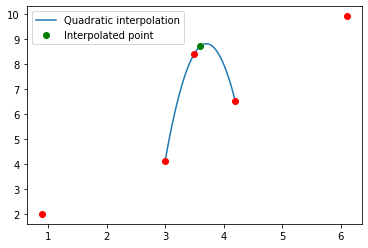

In [45]:
import numpy as np

point = 3.6

def automatic_quadratic(x,y,point, plot):
    ### reuse your logic for finding the index here:
    
    

    x_data = #define the proper lists for the quadratic_interpolation function here
    y_data = #define the proper lists for the quadratic_interpolation function here
    c_0,c_1,c_2 = quadratic_interpolation(x_data,y_data)
    
    inter_val = c_0 + c_1 * (point-x_data[0])+c_2*(point-x_data[0])*(point-x_data[1])
    
    if plot == "y":
        xrange = np.linspace(x_data[0],x_data[2],100)
        yrange = c_0 + c_1* (xrange-x_data[0])+c_2*(xrange-x_data[0])*(xrange-x_data[1])
        plt.plot(xrange,yrange, label = "Quadratic interpolation")
    
    return inter_val

def quadratic_interpolation(x,y):
    '''This function should find the constants defined above from the 2 lists
    of 3 x and y-coordinates and return the constants'''
    ## Write your code here

    return c_0,c_1,c_2

inter_val = automatic_quadratic(dataset_x,dataset_y,point,"y")
print(inter_val)
plt.plot(point, inter_val, "go", label = "Interpolated point")
plt.plot(dataset_x, dataset_y, "ro")
plt.legend()